<a href="https://colab.research.google.com/github/lingw1221/Image-Caption-Generator-Using-Deep-Learning---VGG19-ResNet50-InceptionV3/blob/main/Deploy_Image_Caption_Generator_with_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=WLwjvWq0GWA

https://github.com/amrrs/streamlit-colab-pyngrok/blob/main/Streamlit_%2B_Colab_wit_pyngrok.ipynb


In [27]:
! pip install streamlit -q

In [28]:
!pip install --upgrade streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
%%writefile app.py
import os
import streamlit as st
from PIL import Image
from io import BytesIO
import urllib.request
import requests
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob
import PIL
from PIL import Image
import time
from tqdm import tqdm
import shutil
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from keras.layers import Dense, Input, Conv2D, MaxPool2D, LSTM, add, Activation, Dropout, Flatten, Embedding
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from nltk.translate.bleu_score import corpus_bleu

# feature extraction model 
# Load the VGG19 model
vgginput = VGG19(weights='imagenet')
# Create a new model, by removing the last layer (output layer) from the vgg19
fe_vgg_model = Model(vgginput.input, vgginput.layers[-2].output)

# Load the resnet50 model
resnet_input = ResNet50(weights='imagenet')
# Create a new model, by removing the last layer (output layer) from the resnet50
fe_rsn_model = Model(resnet_input.input, resnet_input.layers[-2].output)

# Load the inception v3 model
input_intercept = InceptionV3(weights='imagenet')
# Create a new model, by removing the last layer (output layer) from the inception v3
fe_itp_model = Model(input_intercept.input, input_intercept.layers[-2].output)

#Set page layout
st.set_page_config(layout='wide')

#Name the webapp
#webimage = Image.open('/content/drive/MyDrive/DL/header.jpg')

#st.image(webimage, width=500)
st.title('Image Caption Generator Using Deep Learning')

# load image for feature extraction
image_path = st.text_input('Enter Image URL to generate caption...', "https://www.thoughtco.com/thmb/mik7Z00SAYN786BQbieXWOzZmc8=/2121x1414/filters:fill(auto,1)/lotus-flower-828457262-5c6334b646e0fb0001dcd75a.jpg")
get_url =requests.get(image_path)
img = Image.open(BytesIO(get_url.content))
# image_path = tf.keras.utils.get_file('5c6334b646e0fb0001dcd75a', origin=image_url)
def feature_extract (fe_model, target_size):
  image = img.resize(target_size)
# convert image pixels to numpy array
  image = img_to_array(image)
# reshape data for model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# preprocess image for vgg
  image = preprocess_input(image)
# extract features
  feature = fe_model.predict(image, verbose=0)
  return feature
if image_path is not None:
  content = requests.get(image_path).content
fe_vgg = feature_extract(fe_vgg_model, (224,224))
fe_rsn = feature_extract(fe_rsn_model, (224,224))
fe_itcp = feature_extract(fe_itp_model, (299,299))

# Trained Models for prediction
vgg19_model = load_model('/content/drive/MyDrive/DL/vgg_model.h5')
rsn_model = load_model('/content/drive/MyDrive/DL/rsn_model.h5')
itcp_model = load_model('/content/drive/MyDrive/DL/itcp_model.h5')

open_file = open('/content/drive/MyDrive/DL/all_captions.txt', 'r')
read_file = open_file.read()
all_captions = read_file.split("\n")

# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
caption_max_length = max(len(caption.split()) for caption in all_captions)

def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate caption for an image
def predict_caption(model, image, tokenizer, caption_max_length):
    # add start tag for generation process
    in_text = 'begincaption'
    # iterate over the max length of sequence
    for i in range(caption_max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], caption_max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endcaption':
            break
      
    return in_text

y_pred_vgg = predict_caption(vgg19_model, fe_vgg, tokenizer, caption_max_length)
y_pred_rsn = predict_caption(rsn_model, fe_rsn, tokenizer, caption_max_length)
y_pred_itcp = predict_caption(itcp_model, fe_itcp, tokenizer, caption_max_length)  

if image_path is not None:

  st.write('Caption generated by VGG19 model:')
  with st.spinner('predicting...'):
    st.write(y_pred_vgg)

  st.write('Caption generated by ResNet50 model:')
  with st.spinner('predicting...'):
    st.write(y_pred_rsn)

  st.write('Caption generated by InceptionV3 model:')
  with st.spinner('predicting...'):
    st.write(y_pred_itcp)

  st.write("")

  
  image = Image.open(BytesIO(get_url.content))
  st.image(image, caption='Generate caption for this image', use_column_width=True)




Overwriting app.py


In [30]:
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pyngrok import ngrok

In [32]:
ngrok.set_auth_token("2CGnBIdriLEEh8tlbLjzn7pY6Fp_4H4nGkuoYerAigWnkv6oU") 

In [33]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://6f35-34-125-147-62.ngrok.io" -> "http://localhost:80"


In [26]:
# ngrok.kill()

In [34]:
from pyngrok import ngrok

tunnels = ngrok.get_tunnels()
tunnels

[<NgrokTunnel: "https://6f35-34-125-147-62.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "http://6f35-34-125-147-62.ngrok.io" -> "http://localhost:80">]

Not sure why some urls of images doesn't work but some works 

Doesn't work : https://www.collinsdictionary.com/images/full/dog_230497594_1000.jpg

works: https://www.lovethispic.com/uploaded_images/350018-Cute-Bunny.jpg

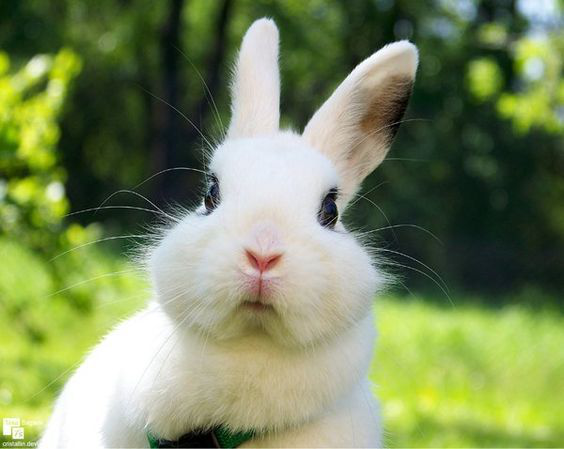

In [17]:
from PIL import Image
from io import BytesIO
import urllib.request
import requests

image_path =  "https://www.lovethispic.com/uploaded_images/350018-Cute-Bunny.jpg"
get_url =requests.get(image_path)
img = Image.open(BytesIO(get_url.content))
img